In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
import torch
from torch import nn, optim
from jcopdl.callback import Callback, set_config

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

# Import Data

source: http://www.bom.gov.au/climate/data/

In [3]:
df = pd.read_csv("data/daily_min_temp.csv", parse_dates=["Date"], index_col="Date")
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


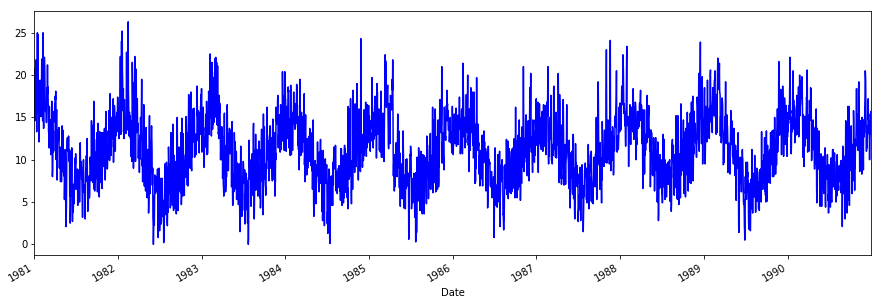

In [4]:
df.Temp.plot(figsize=(15, 5), color='b')

# Dataset Splitting

In [5]:
ts_train, ts_test = train_test_split(df, test_size=0.2, shuffle=False)
ts_train.shape, ts_test.shape

((2920, 1), (730, 1))

# Prepare Sequence

In [6]:
from jcopdl.utils.dataloader import TimeSeriesDataset
from torch.utils.data import DataLoader

In [7]:
seq_len = 14
bs = 32

train_set = TimeSeriesDataset(ts_train, "Temp", seq_len)
trainloader = DataLoader(train_set, batch_size=bs)

test_set = TimeSeriesDataset(ts_test, "Temp", seq_len)
testloader = DataLoader(test_set, batch_size=bs)

(N, S, F): (208, 14, 1)
Note: last 7 data excluded

(N, S, F): (52, 14, 1)
Note: last 1 data excluded



# Arsitektur & Config

In [8]:
from jcopdl.layers import linear_block

In [9]:
class GRU(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers, dropout):
        super().__init__()
        
        self.rnn = nn.GRU(input_size, hidden_size, num_layers, dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x, hidden):        
        x, hidden = self.rnn(x, hidden)
        x = self.fc(x)
        return x, hidden

In [10]:
config = set_config({
    "input_size": train_set.n_feature,
    "seq_len": train_set.n_seq,
    "output_size": 1,
    "hidden_size": 64,
    "num_layers": 2,
    "dropout": 0
})

# Training Preparation -> MCOC

In [11]:
model = GRU(config.input_size, config.output_size, config.hidden_size, config.num_layers, config.dropout).to(device)
criterion = nn.MSELoss(reduction='mean')
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config, outdir='model/gru')

# Training


Epoch     1
Train_cost  = 117.8377 | Test_cost  = 106.5699 | 

Epoch     2
Train_cost  = 88.8866 | Test_cost  = 79.4487 | 

Epoch     3
Train_cost  = 66.2185 | Test_cost  = 62.0071 | 

Epoch     4
Train_cost  = 52.7219 | Test_cost  = 51.9161 | 

Epoch     5
Train_cost  = 44.5907 | Test_cost  = 44.9723 | 

Epoch     6
Train_cost  = 38.7574 | Test_cost  = 39.5826 | 

Epoch     7
Train_cost  = 34.1766 | Test_cost  = 35.2134 | 

Epoch     8
Train_cost  = 30.4738 | Test_cost  = 31.6281 | 

Epoch     9
Train_cost  = 27.4597 | Test_cost  = 28.6773 | 

Epoch    10
Train_cost  = 25.0082 | Test_cost  = 26.2553 | 

Epoch    11
Train_cost  = 23.0260 | Test_cost  = 24.2793 | 

Epoch    12
Train_cost  = 21.4377 | Test_cost  = 22.6796 | 

Epoch    13
Train_cost  = 20.1784 | Test_cost  = 21.3956 | 

Epoch    14
Train_cost  = 19.1915 | Test_cost  = 20.3740 | 

Epoch    15
Train_cost  = 18.4273 | Test_cost  = 19.5680 | 

Epoch    16
Train_cost  = 17.8429 | Test_cost  = 18.9372 | 

Epoch    17
Train_cos

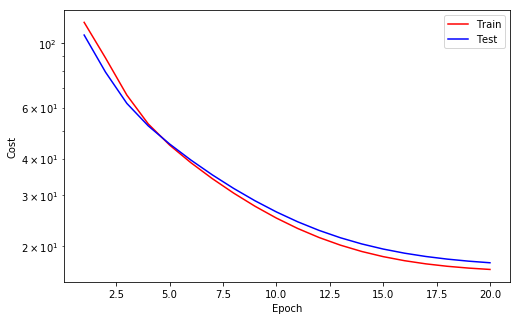


Epoch    21
Train_cost  = 16.5186 | Test_cost  = 17.3825 | 

Epoch    22
Train_cost  = 16.4240 | Test_cost  = 17.2513 | 

Epoch    23
Train_cost  = 16.3552 | Test_cost  = 17.1504 | 

Epoch    24
Train_cost  = 16.3048 | Test_cost  = 17.0724 | 

Epoch    25
Train_cost  = 16.2673 | Test_cost  = 17.0118 | 

Epoch    26
Train_cost  = 16.2387 | Test_cost  = 16.9641 | 

Epoch    27
Train_cost  = 16.2162 | Test_cost  = 16.9261 | 

Epoch    28
Train_cost  = 16.1976 | Test_cost  = 16.8953 | 

Epoch    29
Train_cost  = 16.1813 | Test_cost  = 16.8696 | 

Epoch    30
Train_cost  = 16.1660 | Test_cost  = 16.8471 | 

Epoch    31
Train_cost  = 16.1505 | Test_cost  = 16.8259 | 

Epoch    32
Train_cost  = 16.1328 | Test_cost  = 16.8035 | 

Epoch    33
Train_cost  = 16.1107 | Test_cost  = 16.7778 | 

Epoch    34
Train_cost  = 16.0828 | Test_cost  = 16.7485 | 

Epoch    35
Train_cost  = 16.0466 | Test_cost  = 16.7087 | 

Epoch    36
Train_cost  = 15.9932 | Test_cost  = 16.6463 | 

Epoch    37
Train_cost 

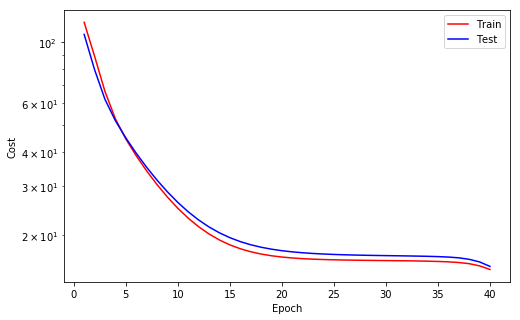


Epoch    41
Train_cost  = 14.2575 | Test_cost  = 14.4105 | 

Epoch    42
Train_cost  = 13.2041 | Test_cost  = 13.2736 | 

Epoch    43
Train_cost  = 12.2498 | Test_cost  = 12.4892 | 

Epoch    44
Train_cost  = 11.6390 | Test_cost  = 11.7847 | 

Epoch    45
Train_cost  = 11.0605 | Test_cost  = 11.0835 | 

Epoch    46
Train_cost  = 10.5316 | Test_cost  = 10.4812 | 

Epoch    47
Train_cost  = 10.0805 | Test_cost  = 9.9762 | 

Epoch    48
Train_cost  = 9.7080 | Test_cost  = 9.5256 | 

Epoch    49
Train_cost  = 9.3812 | Test_cost  = 9.1447 | 

Epoch    50
Train_cost  = 9.1019 | Test_cost  = 8.8015 | 

Epoch    51
Train_cost  = 8.8474 | Test_cost  = 8.4951 | 

Epoch    52
Train_cost  = 8.6176 | Test_cost  = 8.2151 | 

Epoch    53
Train_cost  = 8.4101 | Test_cost  = 7.9576 | 

Epoch    54
Train_cost  = 8.2220 | Test_cost  = 7.7286 | 

Epoch    55
Train_cost  = 8.0570 | Test_cost  = 7.5235 | 

Epoch    56
Train_cost  = 7.9124 | Test_cost  = 7.3394 | 

Epoch    57
Train_cost  = 7.7844 | Test_co

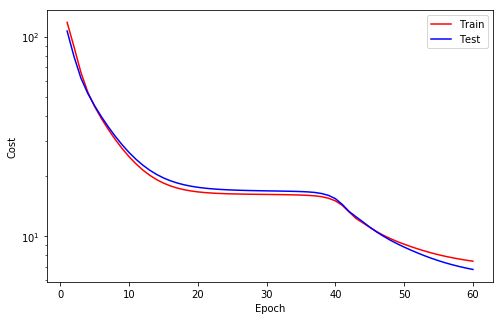


Epoch    61
Train_cost  = 7.3963 | Test_cost  = 6.7022 | 

Epoch    62
Train_cost  = 7.3223 | Test_cost  = 6.6136 | 

Epoch    63
Train_cost  = 7.2547 | Test_cost  = 6.5330 | 

Epoch    64
Train_cost  = 7.1928 | Test_cost  = 6.4595 | 

Epoch    65
Train_cost  = 7.1358 | Test_cost  = 6.3919 | 

Epoch    66
Train_cost  = 7.0833 | Test_cost  = 6.3294 | 

Epoch    67
Train_cost  = 7.0345 | Test_cost  = 6.2714 | 

Epoch    68
Train_cost  = 6.9893 | Test_cost  = 6.2173 | 

Epoch    69
Train_cost  = 6.9472 | Test_cost  = 6.1666 | 

Epoch    70
Train_cost  = 6.9078 | Test_cost  = 6.1189 | 

Epoch    71
Train_cost  = 6.8710 | Test_cost  = 6.0739 | 

Epoch    72
Train_cost  = 6.8365 | Test_cost  = 6.0313 | 

Epoch    73
Train_cost  = 6.8040 | Test_cost  = 5.9909 | 

Epoch    74
Train_cost  = 6.7734 | Test_cost  = 5.9527 | 

Epoch    75
Train_cost  = 6.7445 | Test_cost  = 5.9164 | 

Epoch    76
Train_cost  = 6.7171 | Test_cost  = 5.8820 | 

Epoch    77
Train_cost  = 6.6912 | Test_cost  = 5.8493 

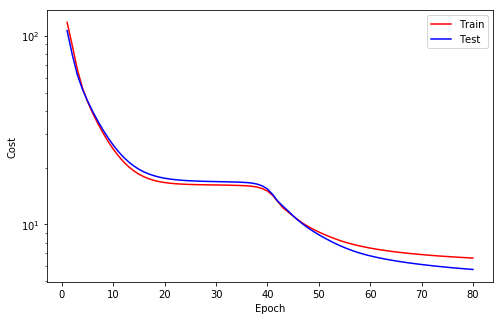


Epoch    81
Train_cost  = 6.5990 | Test_cost  = 5.7342 | 

Epoch    82
Train_cost  = 6.5785 | Test_cost  = 5.7086 | 

Epoch    83
Train_cost  = 6.5588 | Test_cost  = 5.6840 | 

Epoch    84
Train_cost  = 6.5399 | Test_cost  = 5.6603 | 

Epoch    85
Train_cost  = 6.5218 | Test_cost  = 5.6375 | 

Epoch    86
Train_cost  = 6.5044 | Test_cost  = 5.6155 | 

Epoch    87
Train_cost  = 6.4878 | Test_cost  = 5.5943 | 

Epoch    88
Train_cost  = 6.4718 | Test_cost  = 5.5740 | 

Epoch    89
Train_cost  = 6.4564 | Test_cost  = 5.5544 | 

Epoch    90
Train_cost  = 6.4417 | Test_cost  = 5.5356 | 

Epoch    91
Train_cost  = 6.4275 | Test_cost  = 5.5176 | 

Epoch    92
Train_cost  = 6.4139 | Test_cost  = 5.5002 | 

Epoch    93
Train_cost  = 6.4008 | Test_cost  = 5.4834 | 

Epoch    94
Train_cost  = 6.3882 | Test_cost  = 5.4671 | 

Epoch    95
Train_cost  = 6.3762 | Test_cost  = 5.4514 | 

Epoch    96
Train_cost  = 6.3646 | Test_cost  = 5.4362 | 

Epoch    97
Train_cost  = 6.3535 | Test_cost  = 5.4215 

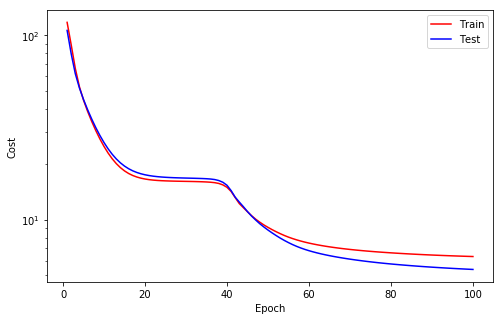


Epoch   101
Train_cost  = 6.3127 | Test_cost  = 5.3675 | 

Epoch   102
Train_cost  = 6.3033 | Test_cost  = 5.3551 | 

Epoch   103
Train_cost  = 6.2941 | Test_cost  = 5.3431 | 

Epoch   104
Train_cost  = 6.2852 | Test_cost  = 5.3316 | 

Epoch   105
Train_cost  = 6.2765 | Test_cost  = 5.3205 | 

Epoch   106
Train_cost  = 6.2679 | Test_cost  = 5.3098 | 

Epoch   107
Train_cost  = 6.2595 | Test_cost  = 5.2995 | 

Epoch   108
Train_cost  = 6.2513 | Test_cost  = 5.2896 | 

Epoch   109
Train_cost  = 6.2432 | Test_cost  = 5.2801 | 

Epoch   110
Train_cost  = 6.2353 | Test_cost  = 5.2710 | 

Epoch   111
Train_cost  = 6.2276 | Test_cost  = 5.2621 | 

Epoch   112
Train_cost  = 6.2201 | Test_cost  = 5.2535 | 

Epoch   113
Train_cost  = 6.2128 | Test_cost  = 5.2451 | 

Epoch   114
Train_cost  = 6.2057 | Test_cost  = 5.2368 | 

Epoch   115
Train_cost  = 6.1988 | Test_cost  = 5.2287 | 

Epoch   116
Train_cost  = 6.1921 | Test_cost  = 5.2208 | 

Epoch   117
Train_cost  = 6.1855 | Test_cost  = 5.2131 

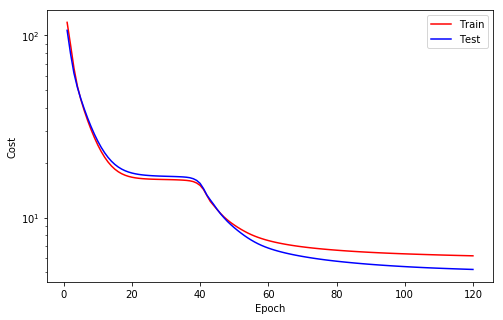


Epoch   121
Train_cost  = 6.1606 | Test_cost  = 5.1841 | 

Epoch   122
Train_cost  = 6.1546 | Test_cost  = 5.1773 | 

Epoch   123
Train_cost  = 6.1487 | Test_cost  = 5.1707 | 

Epoch   124
Train_cost  = 6.1429 | Test_cost  = 5.1644 | 

Epoch   125
Train_cost  = 6.1373 | Test_cost  = 5.1581 | 

Epoch   126
Train_cost  = 6.1317 | Test_cost  = 5.1521 | 

Epoch   127
Train_cost  = 6.1262 | Test_cost  = 5.1463 | 

Epoch   128
Train_cost  = 6.1208 | Test_cost  = 5.1406 | 

Epoch   129
Train_cost  = 6.1155 | Test_cost  = 5.1351 | 

Epoch   130
Train_cost  = 6.1104 | Test_cost  = 5.1298 | 

Epoch   131
Train_cost  = 6.1053 | Test_cost  = 5.1246 | 

Epoch   132
Train_cost  = 6.1003 | Test_cost  = 5.1196 | 

Epoch   133
Train_cost  = 6.0954 | Test_cost  = 5.1148 | 

Epoch   134
Train_cost  = 6.0905 | Test_cost  = 5.1100 | 

Epoch   135
Train_cost  = 6.0857 | Test_cost  = 5.1055 | 

Epoch   136
Train_cost  = 6.0810 | Test_cost  = 5.1011 | 

Epoch   137
Train_cost  = 6.0763 | Test_cost  = 5.0969 

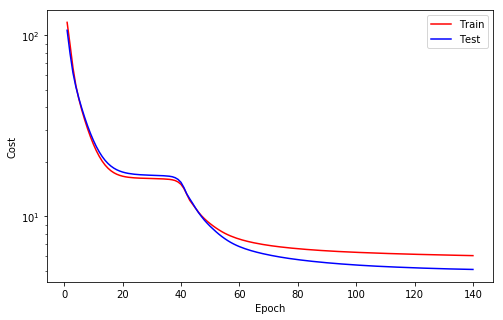


Epoch   141
Train_cost  = 6.0581 | Test_cost  = 5.0817 | 

Epoch   142
Train_cost  = 6.0537 | Test_cost  = 5.0784 | 

Epoch   143
Train_cost  = 6.0494 | Test_cost  = 5.0752 | 

Epoch   144
Train_cost  = 6.0451 | Test_cost  = 5.0723 | 

Epoch   145
Train_cost  = 6.0408 | Test_cost  = 5.0695 | 

Epoch   146
Train_cost  = 6.0366 | Test_cost  = 5.0669 | 

Epoch   147
Train_cost  = 6.0324 | Test_cost  = 5.0646 | 

Epoch   148
Train_cost  = 6.0283 | Test_cost  = 5.0624 | 

Epoch   149
Train_cost  = 6.0242 | Test_cost  = 5.0605 | 

Epoch   150
Train_cost  = 6.0201 | Test_cost  = 5.0588 | 

Epoch   151
Train_cost  = 6.0161 | Test_cost  = 5.0572 | 

Epoch   152
Train_cost  = 6.0121 | Test_cost  = 5.0559 | 

Epoch   153
Train_cost  = 6.0081 | Test_cost  = 5.0549 | 

Epoch   154
Train_cost  = 6.0042 | Test_cost  = 5.0540 | 

Epoch   155
Train_cost  = 6.0002 | Test_cost  = 5.0533 | 

Epoch   156
Train_cost  = 5.9963 | Test_cost  = 5.0529 | 

Epoch   157
Train_cost  = 5.9924 | Test_cost  = 5.0527 

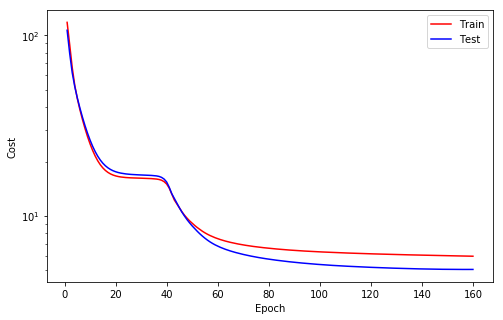

==> EarlyStop patience =  3 | Best test_cost: 5.0527

Epoch   161
Train_cost  = 5.9770 | Test_cost  = 5.0541 | 
==> EarlyStop patience =  4 | Best test_cost: 5.0527

Epoch   162
Train_cost  = 5.9731 | Test_cost  = 5.0549 | 
==> EarlyStop patience =  5 | Best test_cost: 5.0527
==> Execute Early Stopping at epoch: 162 | Best test_cost: 5.0527
==> Best model is saved at model/gru


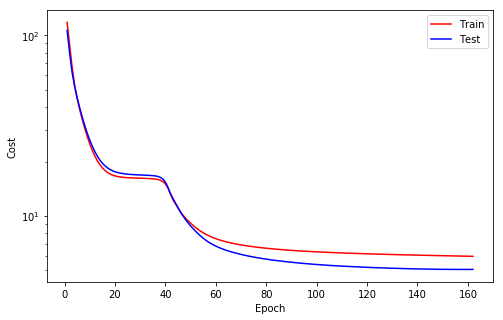

In [12]:
while True:    
    ## Training ##
    model.train()
    cost = 0
    for inputs, targets in trainloader:
        inputs, targets = inputs.to(device), targets.to(device)

        output, hidden = model(inputs, None)
        loss = criterion(output, targets)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        hidden.detach_()

        cost += loss.item() * inputs.shape[0]
    train_cost = cost / len(train_set)
    
    ## Testing ##
    with torch.no_grad():
        model.eval()
        cost = 0
        for inputs, targets in testloader:
            inputs, targets = inputs.to(device), targets.to(device)

            output, hidden = model(inputs, None)
            loss = criterion(output, targets)

            cost += loss.item() * inputs.shape[0]
        test_cost = cost / len(test_set)

    ## Callback ##
    # Logging
    callback.log(train_cost, test_cost)

    # Checkpoint
    callback.save_checkpoint()
        
    # Runtime Plotting
    callback.cost_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_cost"):
        callback.plot_cost()        
        break

# Load Best Model

In [13]:
weights = torch.load("model/gru/weights_best.pth", map_location="cpu")
model.load_state_dict(weights)

<All keys matched successfully>

# Forecast

In [14]:
from luwiji.rnn import illustration

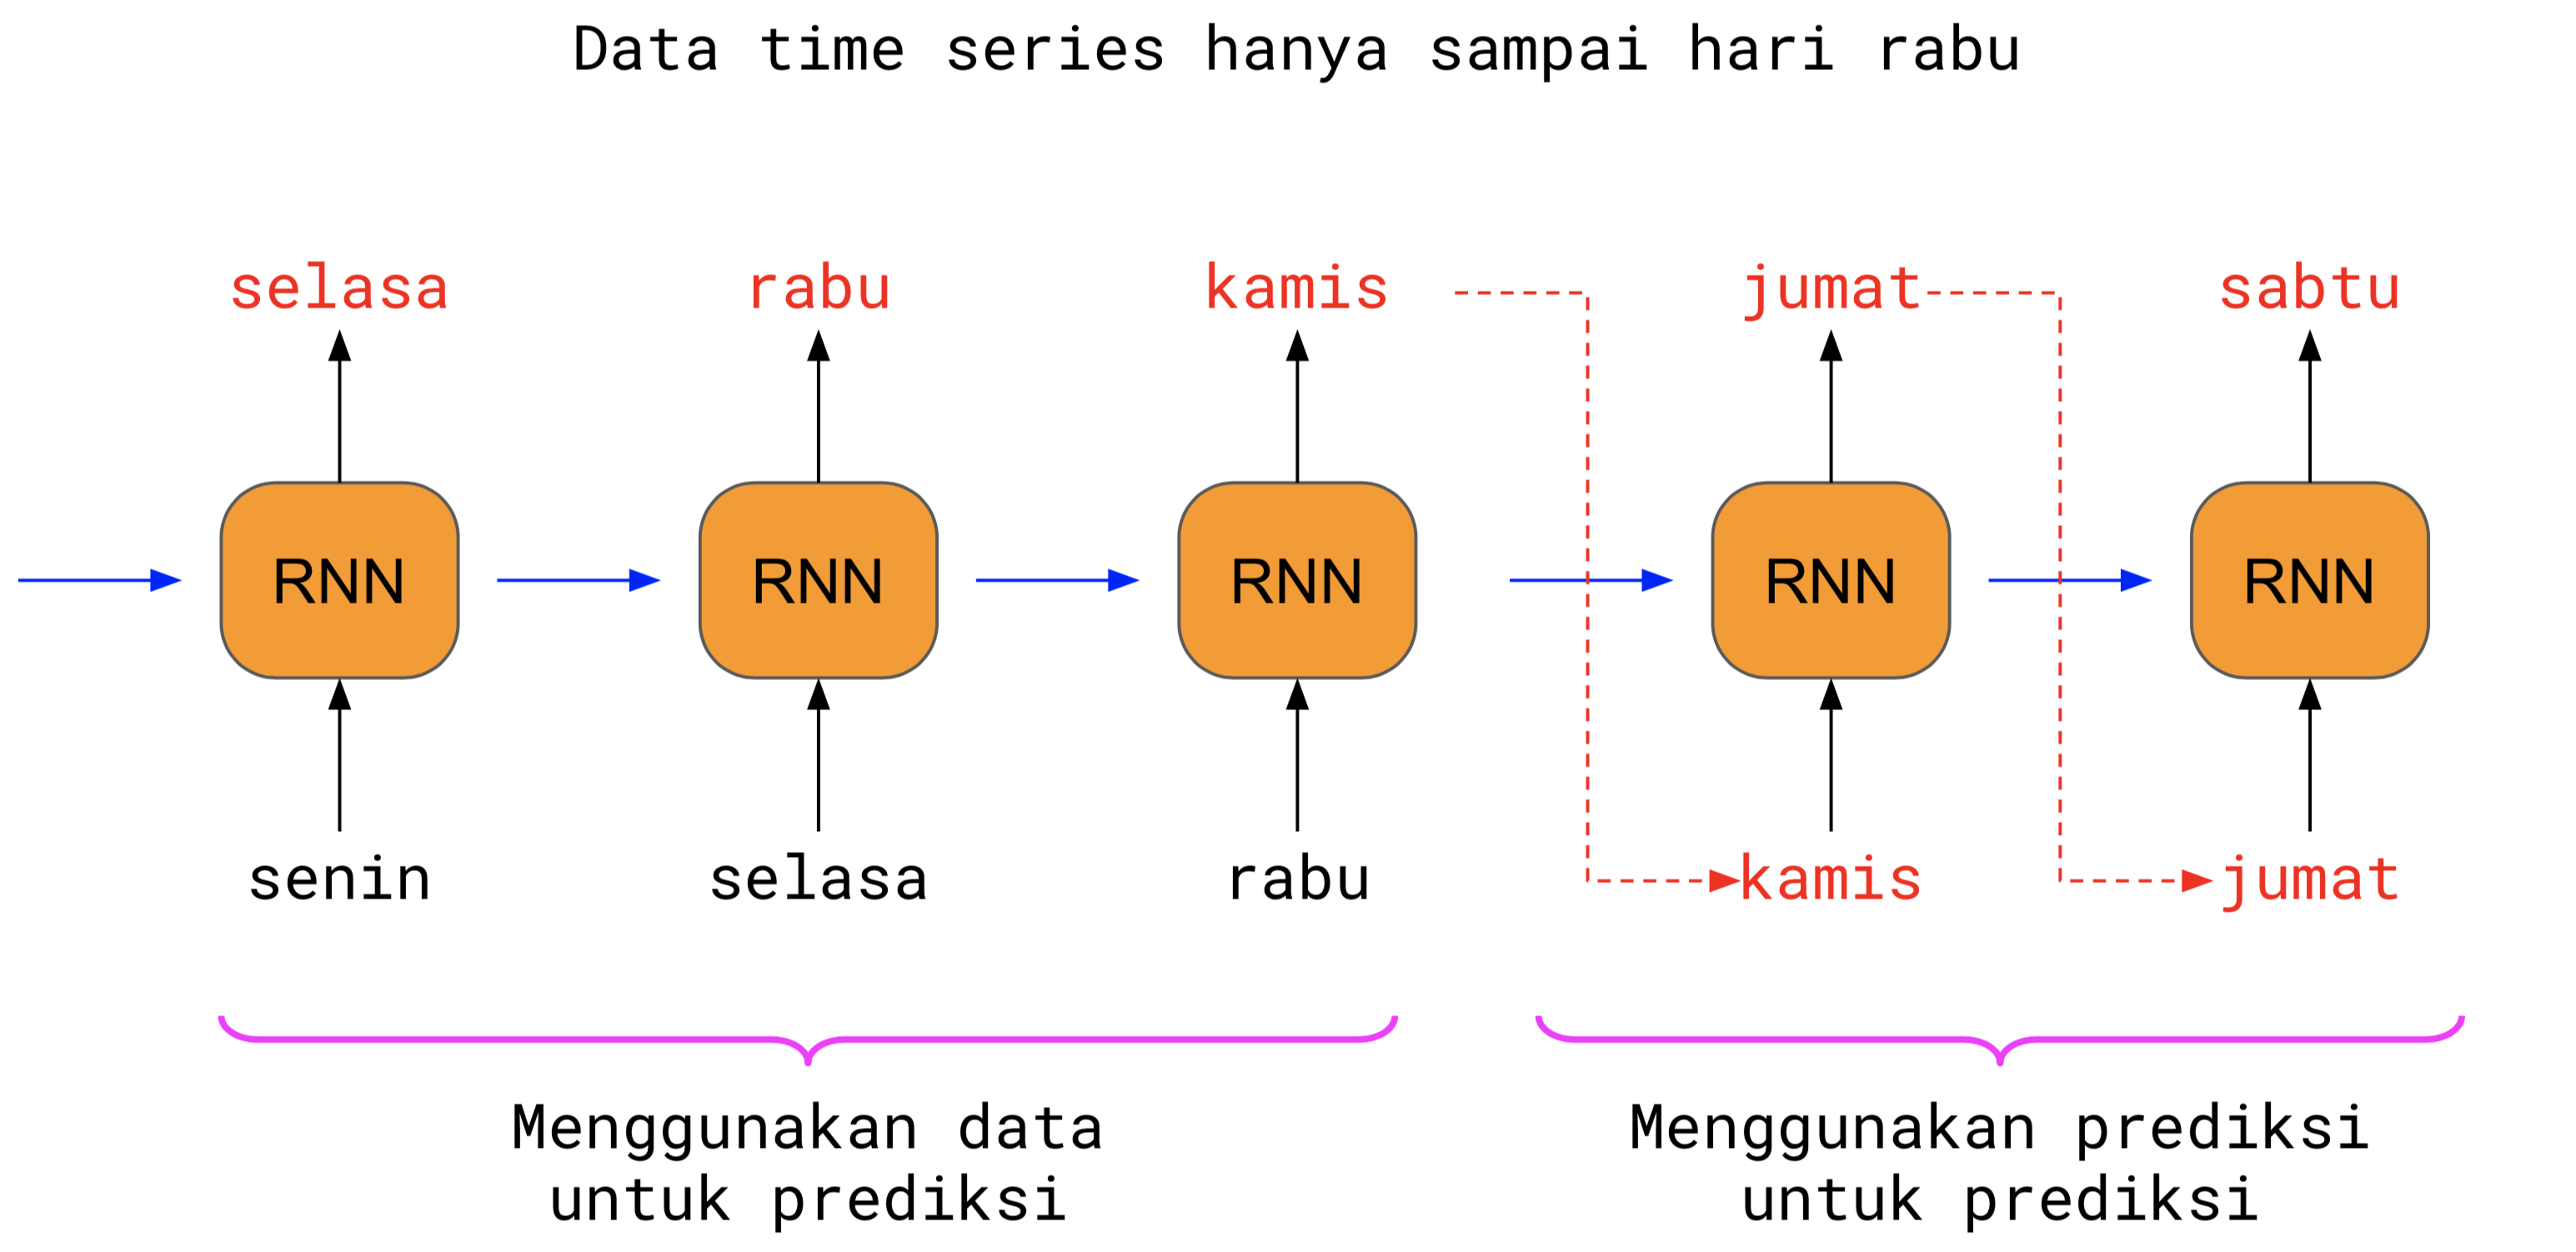

In [15]:
illustration.forecast

In [16]:
from utils import data4pred, pred4pred

In [17]:
train_forecast_set = TimeSeriesDataset(ts_train, "Temp", 1)
trainforecastloader = DataLoader(train_forecast_set)

test_forecast_set = TimeSeriesDataset(ts_test, "Temp", 1)
testforecastloader = DataLoader(test_forecast_set)

(N, S, F): (2919, 1, 1)
Note: last 0 data excluded

(N, S, F): (729, 1, 1)
Note: last 0 data excluded



Text(0.5, 1.0, 'Test')

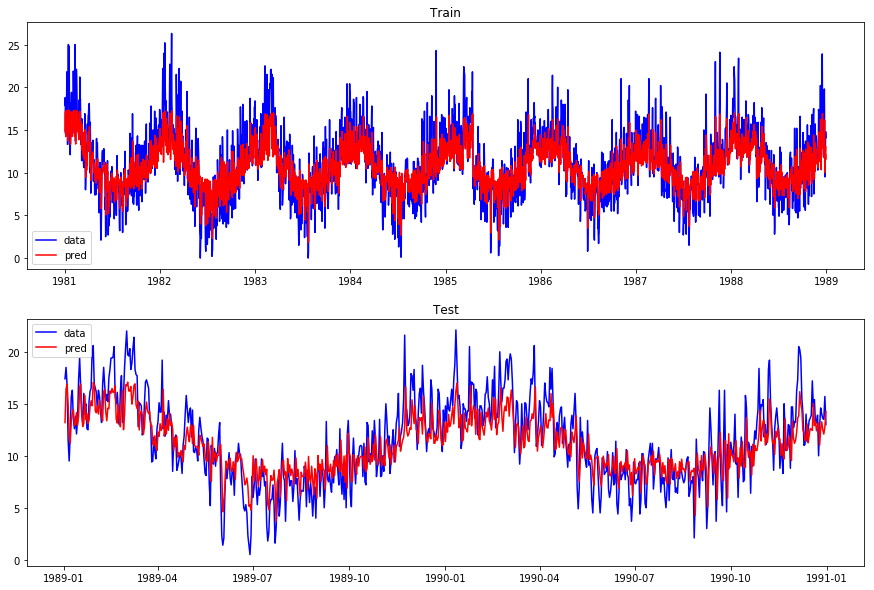

In [18]:
plt.figure(figsize=(15, 10))
    
plt.subplot(211)
data4pred(model, train_forecast_set, trainforecastloader, device)
plt.title("Train")

plt.subplot(212)
data4pred(model, test_forecast_set, testforecastloader, device)
plt.title("Test")

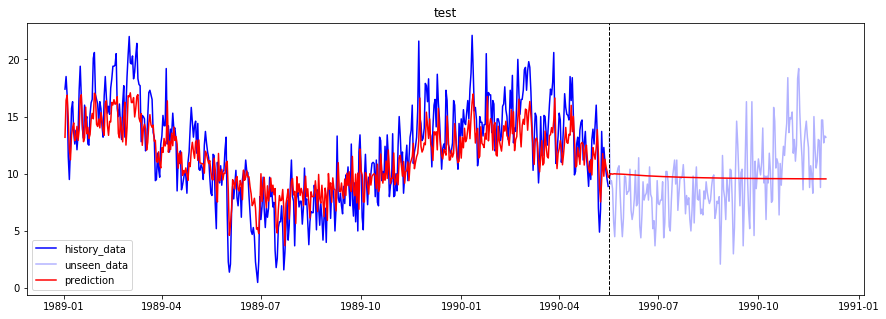

In [19]:
plt.figure(figsize=(15, 5))
pred4pred(model, test_forecast_set, testforecastloader, device)
plt.title("test");